In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Exploration

In [2]:
df = pd.read_csv("sales_data_challenge.csv")

In [3]:
print(df.head())

   order_id        date product_id     category   price  quantity  \
0         1  2025-01-20       P043  Electronics    5.14         5   
1         2  2024-11-15       P048        Books   54.07         1   
2         3  2024-12-08       P030         Home  256.96         5   
3         4  2024-12-22       P031        Books  205.12         1   
4         5  2024-11-18       P049     Clothing  150.13         5   

  customer_region  
0            East  
1            East  
2           North  
3            West  
4            West  


In [4]:
print(df.describe())

          order_id        price     quantity
count  1000.000000  1000.000000  1000.000000
mean    500.500000   153.889340     3.082000
std     288.819436    87.058211     1.425239
min       1.000000     5.020000     1.000000
25%     250.750000    76.975000     2.000000
50%     500.500000   156.670000     3.000000
75%     750.250000   229.347500     4.000000
max    1000.000000   299.840000     5.000000


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         1000 non-null   int64  
 1   date             1000 non-null   object 
 2   product_id       1000 non-null   object 
 3   category         1000 non-null   object 
 4   price            1000 non-null   float64
 5   quantity         1000 non-null   int64  
 6   customer_region  1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB
None


In [9]:
print("1. order_id")
print(f"→ Nombre total : {df['order_id'].nunique()} valeurs uniques\n")

print("2. date")
print(f"→ Période : de {df['date'].min().date()} à {df['date'].max().date()}\n")

print("3. product_id")
print(f"→ Nombre de produits différents : {df['product_id'].nunique()}")
print(f"→ Exemples : {df['product_id'].unique()[:5]}\n")

print("4. category")
print(f"→ Catégories : {df['category'].unique()}\n")

print("5. price")
print(f"→ Min : {df['price'].min()} / Max : {df['price'].max()}")
print(f"→ Valeurs uniques : {df['price'].nunique()}\n")

print("6. quantity")
print(f"→ Valeurs possibles : {sorted(df['quantity'].unique())}\n")

print("7. customer_region")
print(f"→ Régions clientes : {df['customer_region'].unique()}\n")

1. order_id
→ Nombre total : 1000 valeurs uniques

2. date
→ Période : de 2024-11-15 à 2025-05-16

3. product_id
→ Nombre de produits différents : 50
→ Exemples : ['P043' 'P048' 'P030' 'P031' 'P049']

4. category
→ Catégories : ['Electronics' 'Books' 'Home' 'Clothing' 'Toys']

5. price
→ Min : 5.02 / Max : 299.84
→ Valeurs uniques : 988

6. quantity
→ Valeurs possibles : [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

7. customer_region
→ Régions clientes : ['East' 'North' 'West' 'South']



##Visualizaton

In [7]:
df['date']

,date
0,2025-01-20
1,2024-11-15
2,2024-12-08
3,2024-12-22
4,2024-11-18
...,...
995,2025-05-13
996,2025-03-10
997,2025-04-05
998,2025-02-21


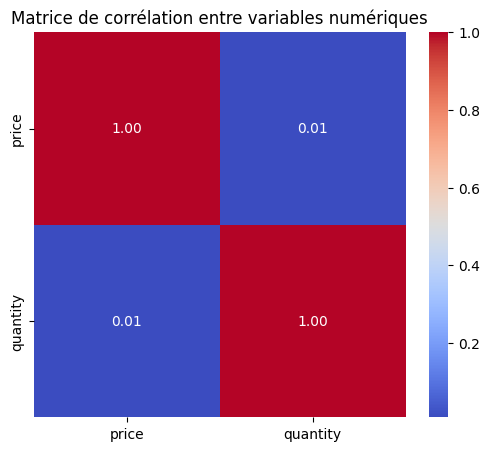

In [11]:
numerical_cols = ['price', 'quantity']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre variables numériques")
plt.show()

Visualization % temps

In [14]:
df['date'] = pd.to_datetime(df['date'])

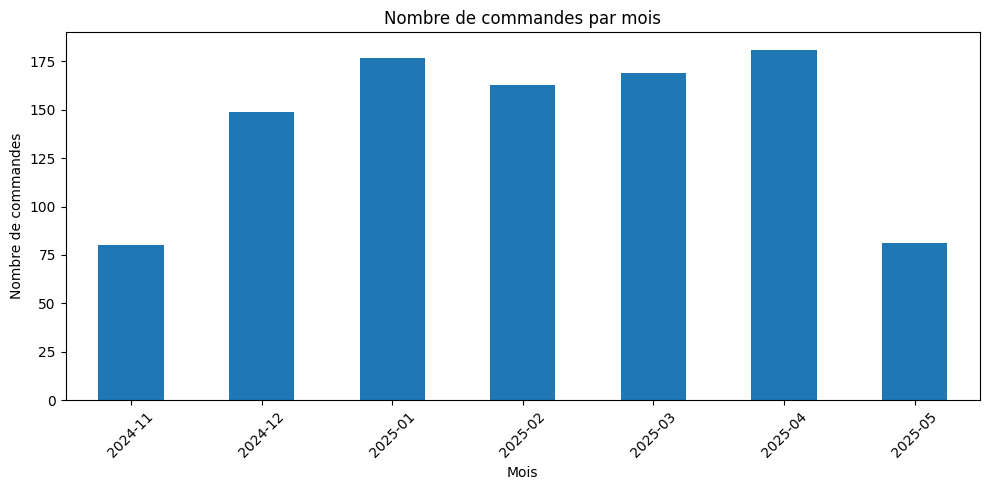

In [15]:
df['mois'] = df['date'].dt.to_period('M').astype(str)
plt.figure(figsize=(10, 5))
df['mois'].value_counts().sort_index().plot(kind='bar')
plt.title("Nombre de commandes par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de commandes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


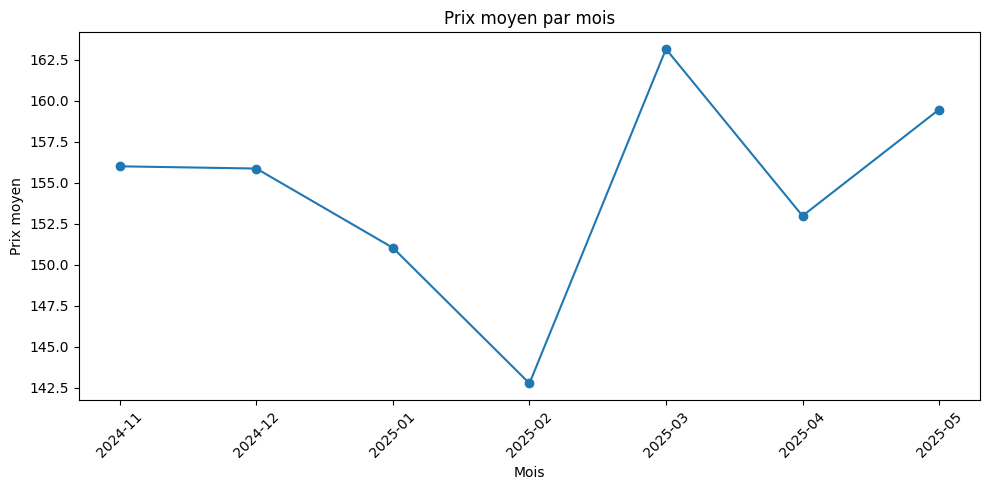

In [16]:
plt.figure(figsize=(10, 5))
df.groupby('mois')['price'].mean().plot(marker='o')
plt.title("Prix moyen par mois")
plt.xlabel("Mois")
plt.ylabel("Prix moyen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


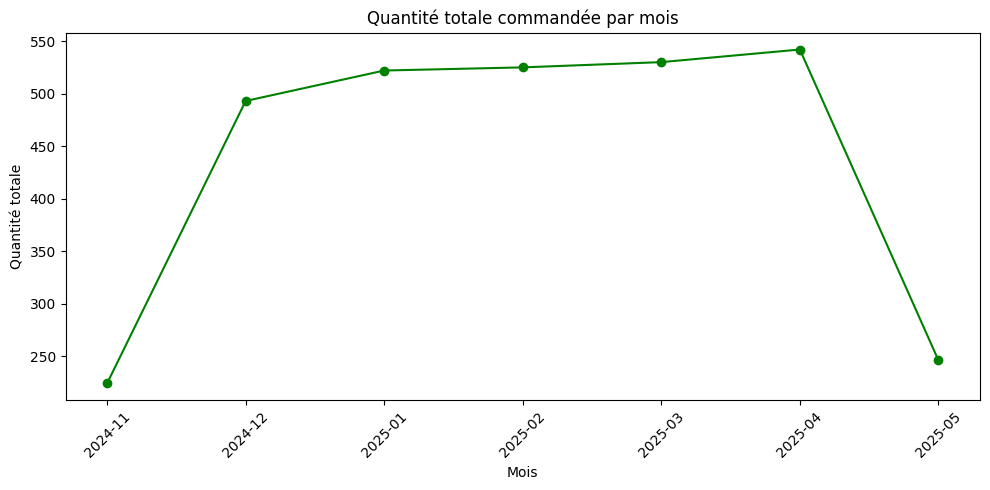

In [17]:
plt.figure(figsize=(10, 5))
df.groupby('mois')['quantity'].sum().plot(marker='o', color='green')
plt.title("Quantité totale commandée par mois")
plt.xlabel("Mois")
plt.ylabel("Quantité totale")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


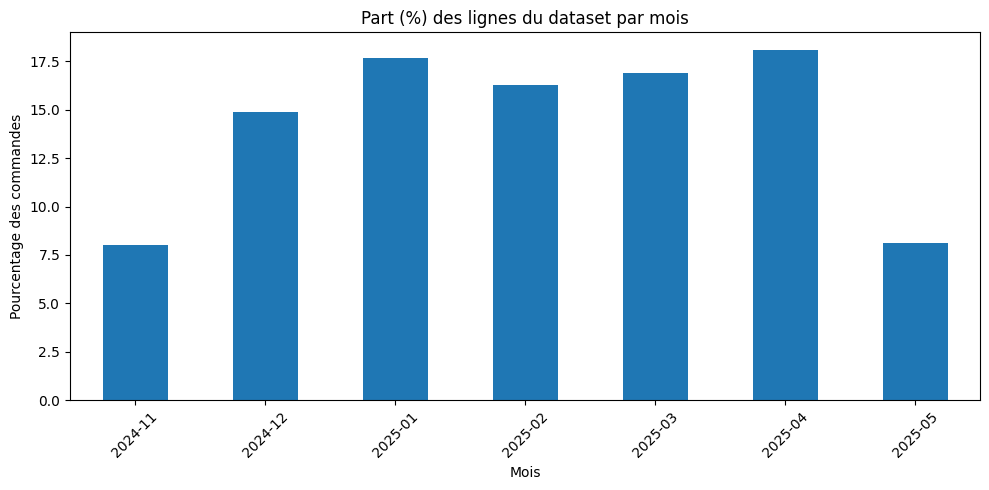

In [18]:
part_commandes = df['mois'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(10, 5))
part_commandes.plot(kind='bar')
plt.title("Part (%) des lignes du dataset par mois")
plt.ylabel("Pourcentage des commandes")
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


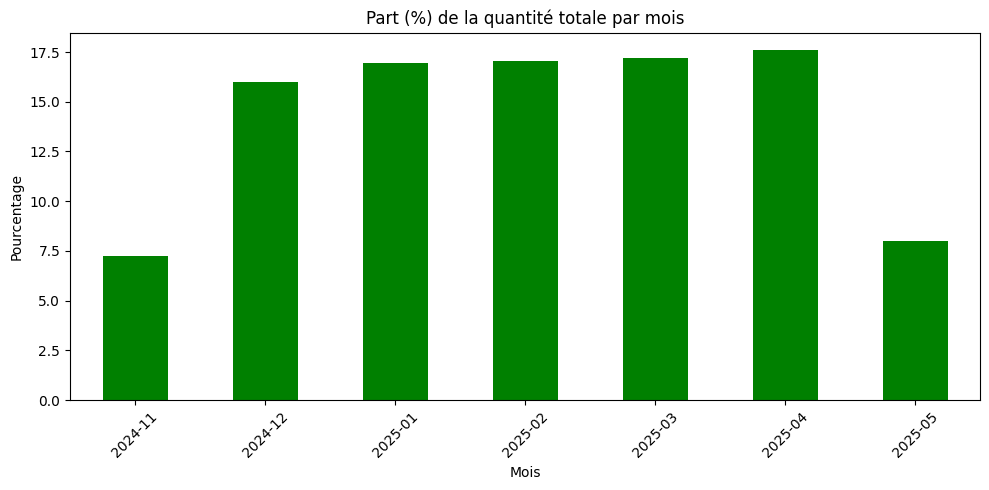

In [19]:
quantite_par_mois = df.groupby('mois')['quantity'].sum()
part_quantite = (quantite_par_mois / quantite_par_mois.sum()) * 100

plt.figure(figsize=(10, 5))
part_quantite.plot(kind='bar', color='green')
plt.title("Part (%) de la quantité totale par mois")
plt.ylabel("Pourcentage")
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


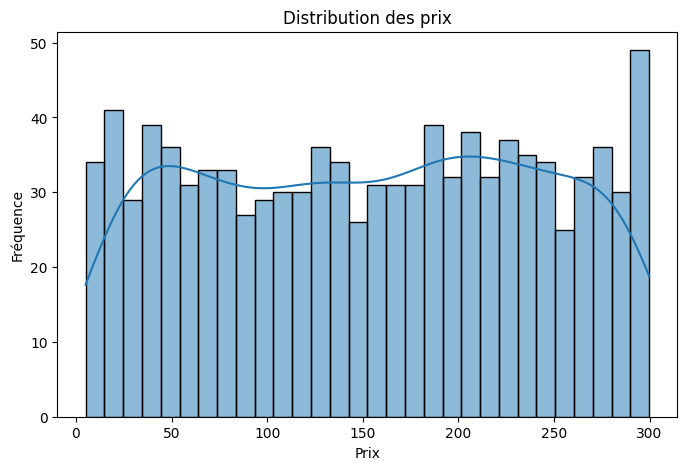

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution des prix")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()


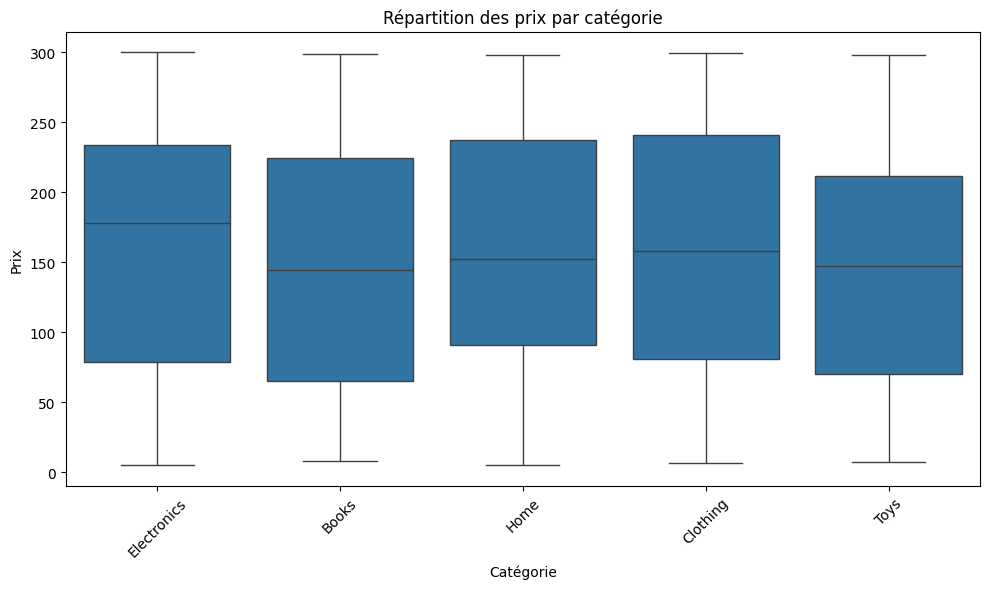

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='price')
plt.title("Répartition des prix par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Prix")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


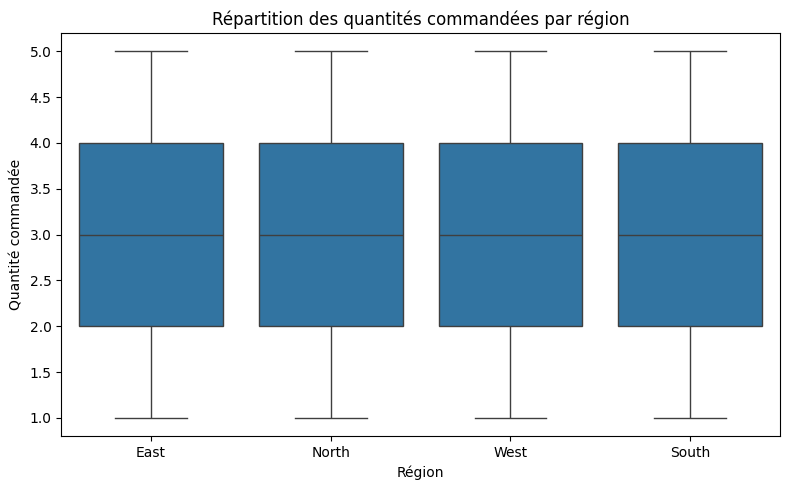

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='customer_region', y='quantity')
plt.title("Répartition des quantités commandées par région")
plt.xlabel("Région")
plt.ylabel("Quantité commandée")
plt.tight_layout()
plt.show()


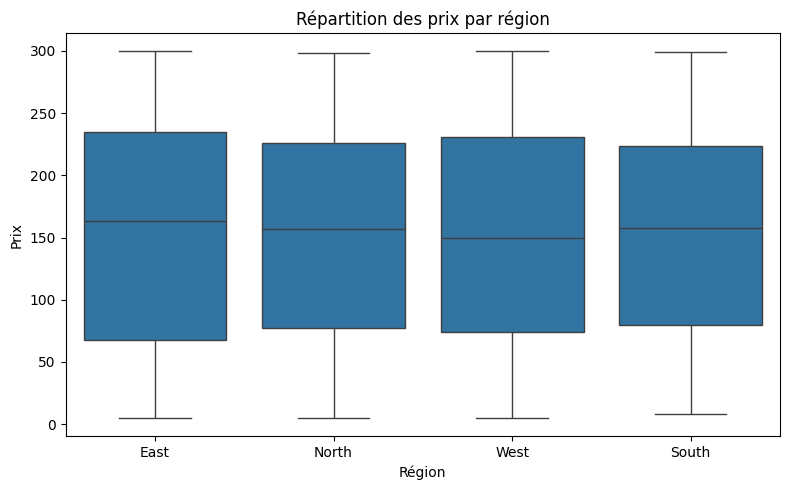

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='customer_region', y='price')
plt.title("Répartition des prix par région")
plt.xlabel("Région")
plt.ylabel("Prix")
plt.tight_layout()
plt.show()


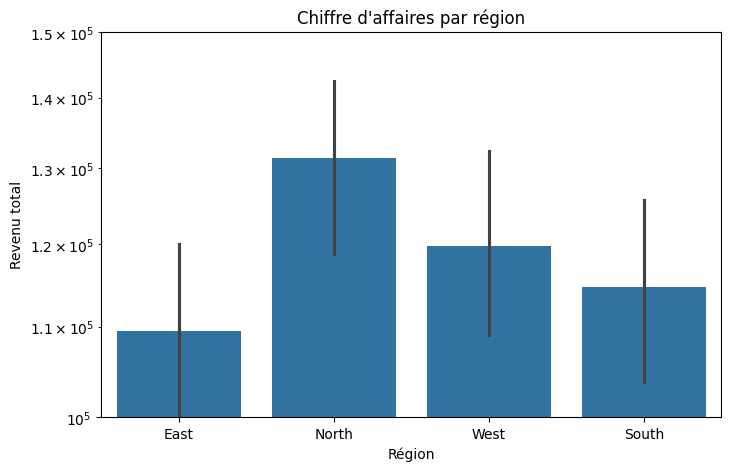

In [30]:
df['revenue'] = df['price'] * df['quantity']

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='customer_region', y='revenue', estimator=sum)
plt.title("Chiffre d'affaires par région")
plt.ylim(100000, 150000)
plt.yscale("log")
plt.xlabel("Région")
plt.ylabel("Revenu total")
plt.show()


<Figure size 1200x600 with 0 Axes>

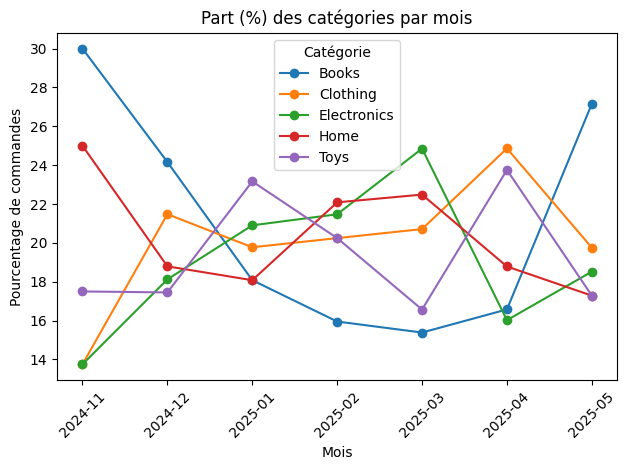

In [31]:
cat_per_month = df.groupby(['mois', 'category'])['order_id'].count().reset_index()

# Pivot pour avoir une colonne par catégorie
pivot = cat_per_month.pivot(index='mois', columns='category', values='order_id').fillna(0)

# Optionnel : transformer en pourcentage par mois
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Visualisation
plt.figure(figsize=(12, 6))
pivot_pct.plot(marker='o')
plt.title("Part (%) des catégories par mois")
plt.xlabel("Mois")
plt.ylabel("Pourcentage de commandes")
plt.xticks(rotation=45)
plt.legend(title="Catégorie")
plt.tight_layout()
plt.show()

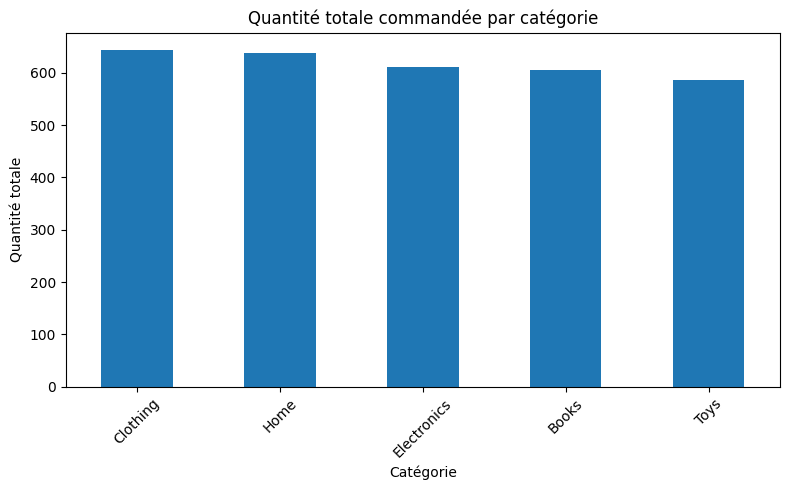

In [32]:
quantite_par_categorie = df.groupby('category')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
quantite_par_categorie.plot(kind='bar')
plt.title("Quantité totale commandée par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Quantité totale")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


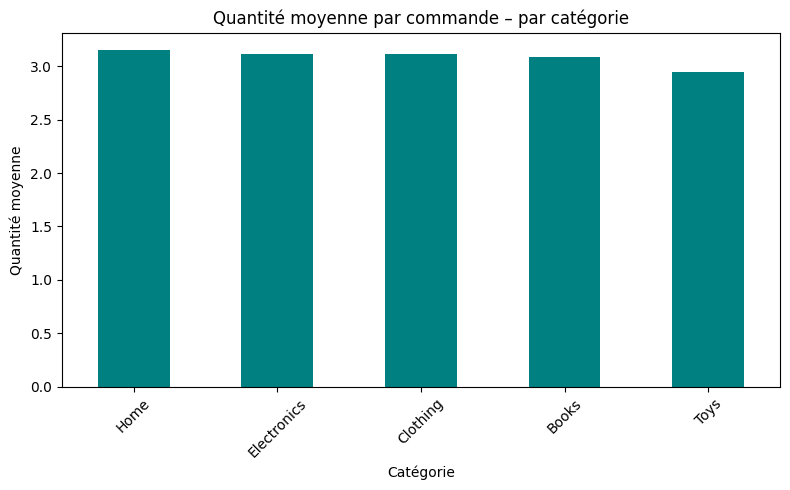

In [33]:
quantite_moyenne_cat = df.groupby('category')['quantity'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
quantite_moyenne_cat.plot(kind='bar', color='teal')
plt.title("Quantité moyenne par commande – par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Quantité moyenne")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


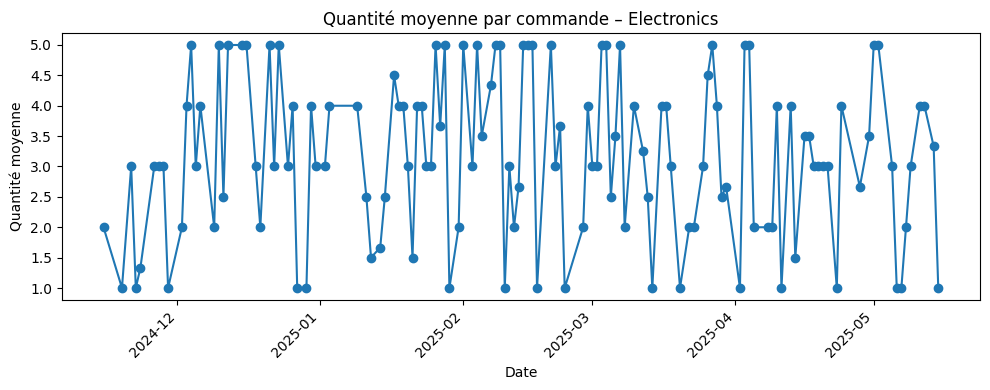

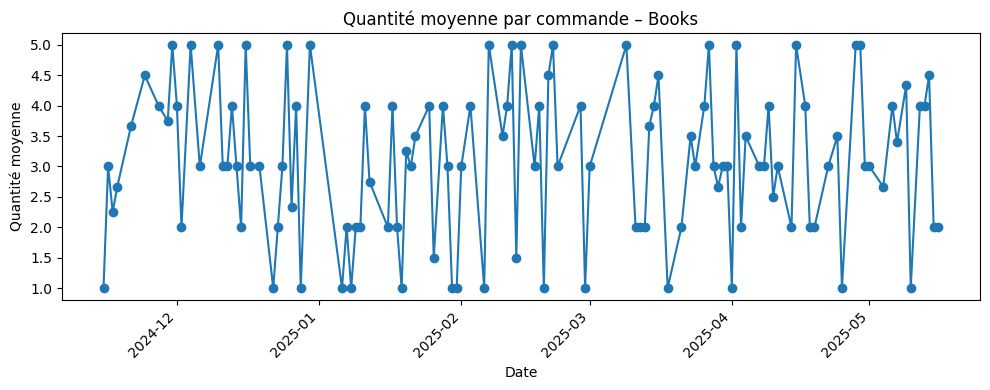

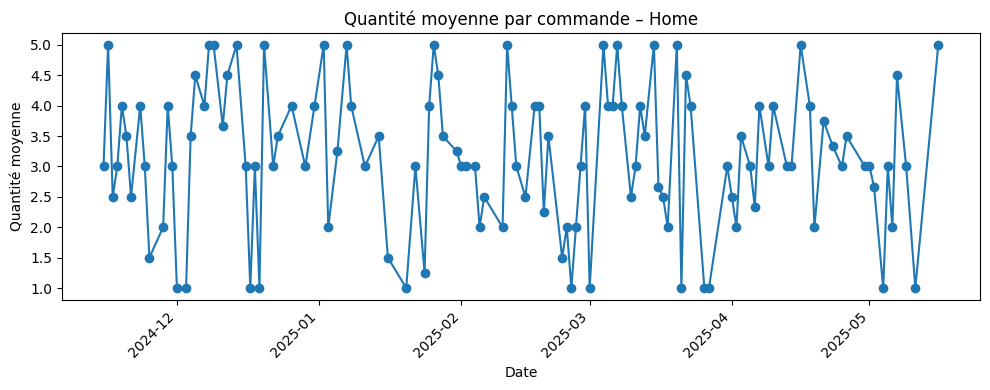

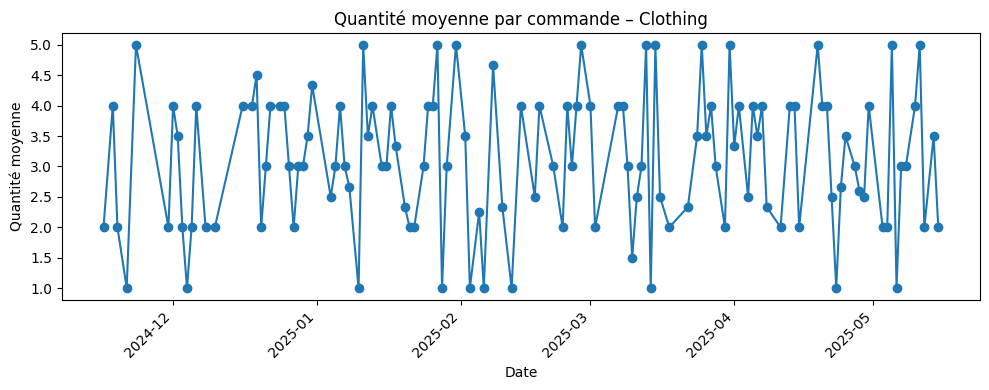

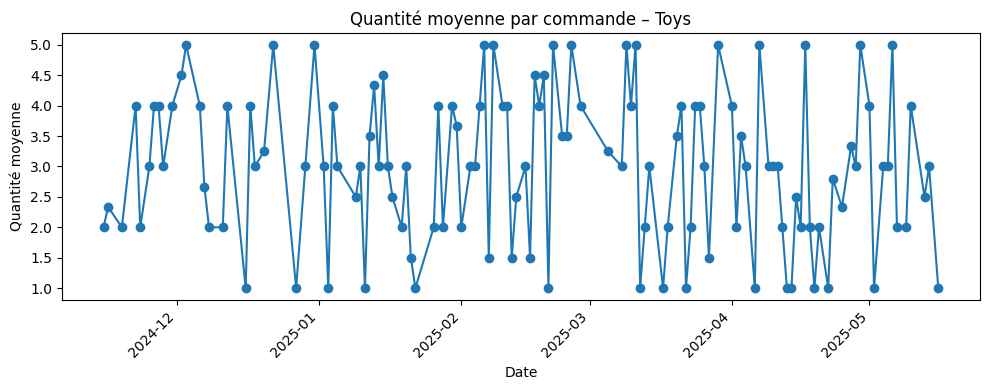

In [37]:
import matplotlib.pyplot as plt

# Assurer le format date
df['date'] = pd.to_datetime(df['date'])

# Liste des catégories uniques
categories = df['category'].unique()

# Boucle sur chaque catégorie
for cat in categories:
    data_cat = df[df['category'] == cat]
    moyenne_par_jour = data_cat.groupby('date')['quantity'].mean()

    plt.figure(figsize=(10, 4))
    moyenne_par_jour.plot(marker='o', linestyle='-')
    plt.title(f"Quantité moyenne par commande – {cat}")
    plt.xlabel("Date")
    plt.ylabel("Quantité moyenne")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


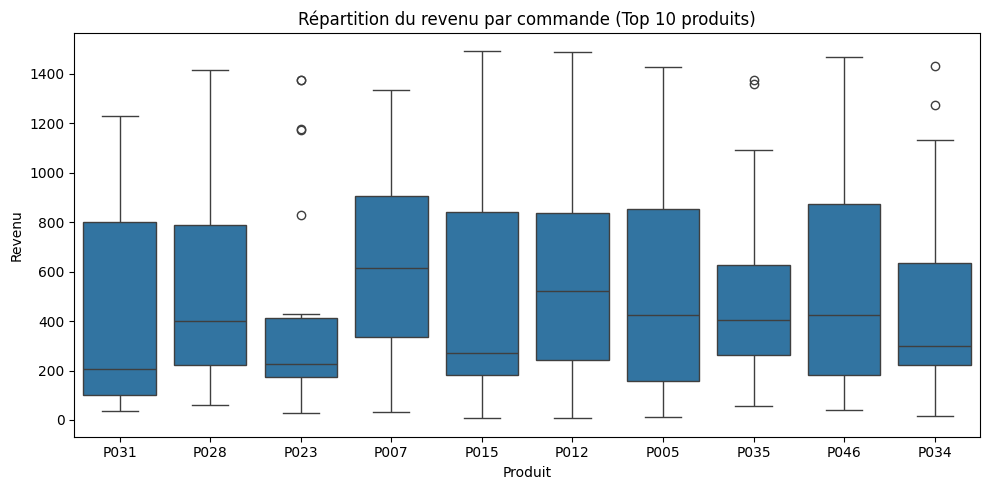

In [38]:
top_products = df['product_id'].value_counts().nlargest(10).index
top_df = df[df['product_id'].isin(top_products)]

plt.figure(figsize=(10, 5))
sns.boxplot(data=top_df, x='product_id', y='revenue')
plt.title("Répartition du revenu par commande (Top 10 produits)")
plt.xlabel("Produit")
plt.ylabel("Revenu")
plt.tight_layout()
plt.show()


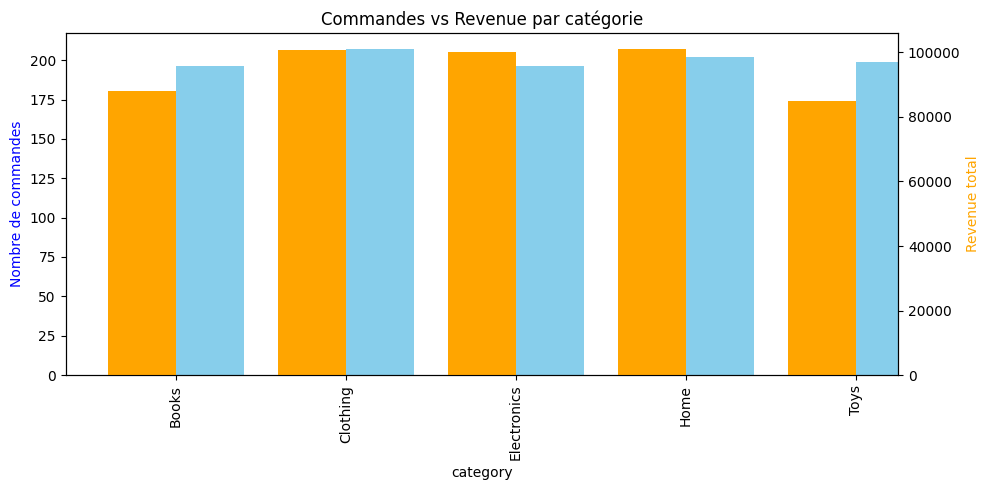

In [39]:
import matplotlib.ticker as mtick

grouped = df.groupby('category').agg({'order_id': 'count', 'revenue': 'sum'}).rename(columns={'order_id': 'commandes'})

fig, ax1 = plt.subplots(figsize=(10, 5))

grouped['commandes'].plot(kind='bar', color='skyblue', ax=ax1, position=0, width=0.4)
ax1.set_ylabel("Nombre de commandes", color='blue')

ax2 = ax1.twinx()
grouped['revenue'].plot(kind='bar', color='orange', ax=ax2, position=1, width=0.4)
ax2.set_ylabel("Revenue total", color='orange')

plt.title("Commandes vs Revenue par catégorie")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


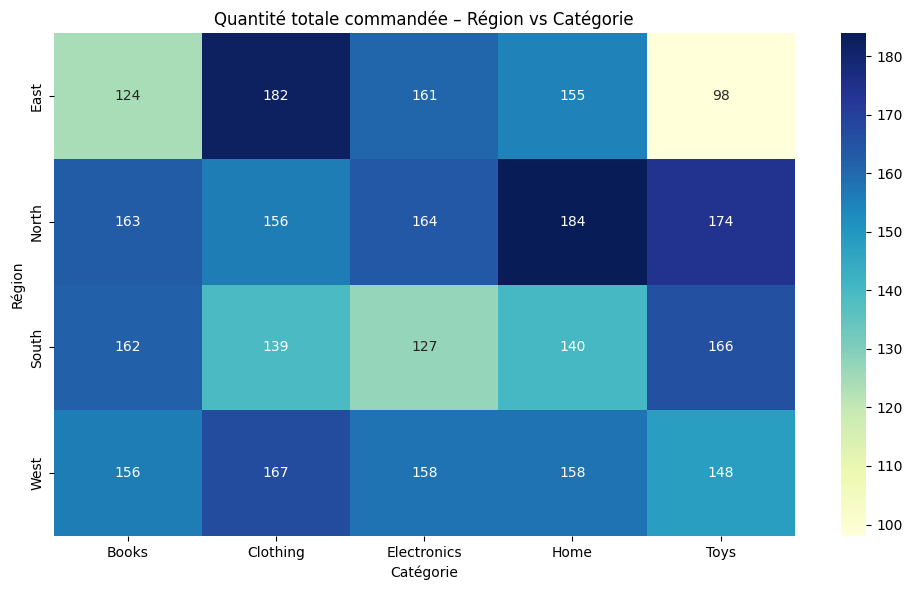

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regrouper : total des quantités par région et par catégorie
heatmap_cat = df.groupby(['customer_region', 'category'])['quantity'].sum().unstack().fillna(0)

# Afficher en heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_cat, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Quantité totale commandée – Région vs Catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Région")
plt.tight_layout()
plt.show()

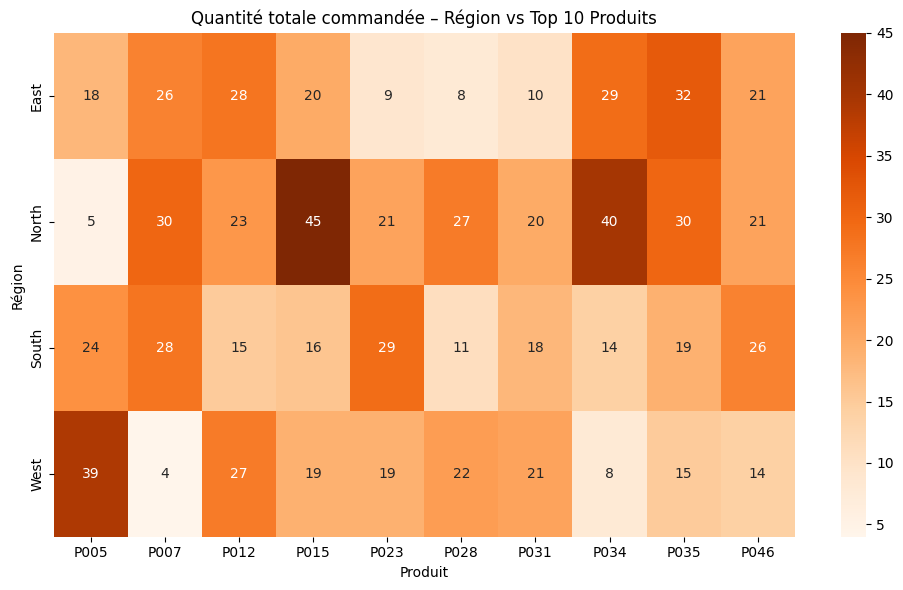

In [41]:
# Top 10 produits les plus commandés
top_products = df['product_id'].value_counts().nlargest(10).index
top_df = df[df['product_id'].isin(top_products)]

# Regrouper : quantités par région et produit
heatmap_prod = top_df.groupby(['customer_region', 'product_id'])['quantity'].sum().unstack().fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_prod, annot=True, fmt=".0f", cmap='Oranges')
plt.title("Quantité totale commandée – Région vs Top 10 Produits")
plt.xlabel("Produit")
plt.ylabel("Région")
plt.tight_layout()
plt.show()


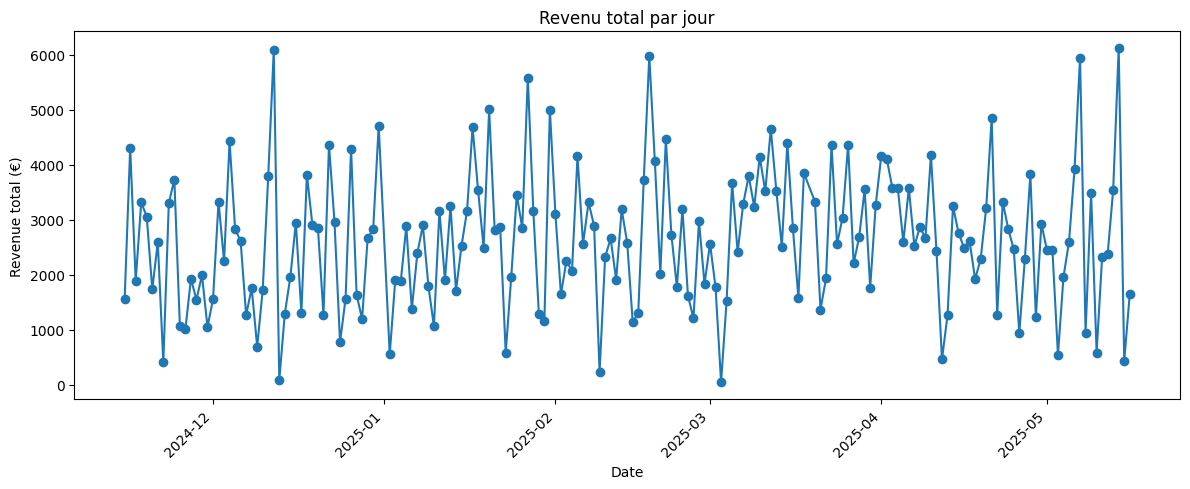

In [42]:
df['date'] = pd.to_datetime(df['date'])
df['revenue'] = df['price'] * df['quantity']

# Regrouper par jour
revenue_par_jour = df.groupby('date')['revenue'].sum()

# Tracer la courbe
plt.figure(figsize=(12, 5))
revenue_par_jour.plot(marker='o')
plt.title("Revenu total par jour")
plt.xlabel("Date")
plt.ylabel("Revenue total (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
pip install plotly


In [46]:
import pandas as pd
import plotly.express as px

# Assurer les bonnes colonnes
df['date'] = pd.to_datetime(df['date'])
df['revenue'] = df['price'] * df['quantity']

# Revenu par jour
revenue_by_day = df.groupby('date')['revenue'].sum().reset_index()

# Plot interactif
fig = px.line(
    revenue_by_day,
    x='date',
    y='revenue',
    title="Revenu total par jour",
    labels={'date': 'Date', 'revenue': 'Revenu (€)'},
    markers=True
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Revenu total (€)",
    hovermode="x unified"
)

fig.show()


In [47]:
fig = px.scatter(
    df,
    x="price",
    y="revenue",
    title="Scatter plot – Prix vs Revenu",
    labels={"price": "Prix", "revenue": "Revenu (€)"},
    color="category",
    hover_data=["product_id"]
)
fig.show()


In [48]:
import plotly.express as px

fig = px.scatter(
    df,
    x="price",
    y="quantity",
    title="Scatter plot – Prix vs Quantité",
    labels={"price": "Prix", "quantity": "Quantité"},
    color="category",
    hover_data=["product_id"]
)
fig.show()


## Conclusions – Patterns identifiés

---

### Pattern 1 – Forte chute des ventes de livres (Books) après un pic initial

Dans le graphe "Part (%) des catégories par mois", la catégorie Books démarre très fort (~30 %) en novembre 2024, puis sa part chute à moins de 15 % sur les mois suivants.

Interprétation : effet de lancement ou saisonnalité non maintenue.  
Action : relancer Books via une campagne promo ciblée ou des bundles thématiques.

---

### Pattern 2 – Revenu journalier très inégal avec des pics soudains

Sur la courbe Plotly, on observe des pics très nets de revenu (ex. : 31 décembre, 18 février à plus de 5000 €) et des jours très faibles (ex. 3 mars : 41 €).

Interprétation : impact probable d’événements ou promotions ponctuelles.  
Action : identifier les déclencheurs de ces pics et les répliquer stratégiquement.

---

### Pattern 3 – La région North surperforme malgré des prix et quantités similaires

Le barplot "Chiffre d’affaires par région" montre que North génère clairement le plus de revenus.  
Mais les boxplots indiquent que les prix et quantités sont similaires dans toutes les régions.

Interprétation : la différence vient du volume de commandes, pas du panier moyen.  
Action : appliquer les leviers utilisés dans North aux autres régions (communication, offres...).

---

### Pattern 4 – Des produits très populaires dans des régions spécifiques

La heatmap "Quantité par région x top 10 produits" montre des préférences régionales nettes :
- P015 est très commandé en North
- P005 est dominant en West
- P034 fonctionne bien en East

Interprétation : certains produits sont fortement localisés en termes de demande.  
Action : adapter le stock et les promotions en fonction des régions.

---
